# Import Library

In [2]:
import os
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
import cv2
import glob
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Download Dataset

In [3]:
# Base dataset
!gdown 1EOnvYEpS7vGPaj196x7ozxP41mSJ-ZJk
# New dataset
!gdown 10BtAXFATfCkN2aZe-wpB3ENjlgoDTLin
# Very new dataset
!gdown 1J2aoQ2ZSDETI2I5quEMuM8kDHulxdaMJ

Downloading...
From: https://drive.google.com/uc?id=1EOnvYEpS7vGPaj196x7ozxP41mSJ-ZJk
To: /content/datasetBackgroundPutihMerge.zip
100% 3.57G/3.57G [00:54<00:00, 65.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=10BtAXFATfCkN2aZe-wpB3ENjlgoDTLin
To: /content/handwrittenNewDataset.zip
100% 3.07M/3.07M [00:00<00:00, 273MB/s]
Downloading...
From: https://drive.google.com/uc?id=1J2aoQ2ZSDETI2I5quEMuM8kDHulxdaMJ
To: /content/handwrittenDatasetVERYNEW.zip
100% 4.61M/4.61M [00:00<00:00, 34.5MB/s]


In [4]:
!unzip -q /content/datasetBackgroundPutihMerge.zip
!unzip -q /content/handwrittenNewDataset.zip
!unzip -q /content/handwrittenDatasetVERYNEW.zip

DATASET_DIRECTORY = "datasetBackgroundPutihMerge/"
NEW_DATASET_DIRECTORY = "handwrittenNewDataset/"
VERY_NEW_DATASET_DIRECTORY = "handwrittenDatasetVERYNEW/"


In [5]:
# Remove corrupt files

filenames = [
    "dataset/test/O/001394.png",
    "dataset/test/O/001397.png",
    "dataset/test/O/001396.png",
    "dataset/test/O/000892.png",
    "dataset/train/6/011900.png",
    "dataset/train/6/011898.png",
    "dataset/train/F/005780.png",
    "dataset/train/9/010953.png",
    "dataset/train/9/010954.png",
    "dataset/validation/1/003231.png",
    "dataset/validation/1/002816.png"
]

for filename in filenames:
  filepath = DATASET_DIRECTORY + filename
  os.remove(filepath)

In [6]:
# How many images for each class to be moved into the base dataset validation
# the rest will be moved into the base dataset training set
NEW_DATASET_VALIDATION_MOVE_SUM = 1

# Move some of the new data to base dataset
for class_name in os.listdir(NEW_DATASET_DIRECTORY):
  # class_name is the A, B, C, etc...
  validation_move_sum = 0
  for filepath in glob.glob(os.path.join(NEW_DATASET_DIRECTORY, class_name, '*.png')):
    if validation_move_sum < NEW_DATASET_VALIDATION_MOVE_SUM:
      # Essentially we don't move anything out of the directory, because this directory
      # is used as the validation directory
      validation_move_sum += 1
      continue
    shutil.move(filepath, os.path.join(DATASET_DIRECTORY, "dataset", "train", class_name))


In [7]:
# Base dataset
# It contains dataset from kaggle and the data that's made by us

# Split dataset between digits, small alphabet, and capital alphabet
DATASET_SMALL_DIR = "datasetSmall"
DATASET_CAPITAL_DIR = "datasetCapital"
DATASET_DIGIT_DIR = "datasetDigit"

for class_name in os.listdir(os.path.join(DATASET_DIRECTORY, "dataset", "train")):
  if class_name.isupper():
    dest_fpath = os.path.join(DATASET_CAPITAL_DIR, "train", class_name)
  elif class_name.islower():
    dest_fpath = os.path.join(DATASET_SMALL_DIR, "train", class_name)
  elif class_name.isdigit():
    dest_fpath = os.path.join(DATASET_DIGIT_DIR, "train", class_name)

  os.makedirs(os.path.dirname(dest_fpath), exist_ok=True)
  shutil.move(os.path.join(DATASET_DIRECTORY, "dataset", "train", class_name), dest_fpath)

for class_name in os.listdir(NEW_DATASET_DIRECTORY):
  if class_name.isupper():
    dest_fpath = os.path.join(DATASET_CAPITAL_DIR, "validation", class_name)
  elif class_name.islower():
    dest_fpath = os.path.join(DATASET_SMALL_DIR, "validation", class_name)
  elif class_name.isdigit():
    dest_fpath = os.path.join(DATASET_DIGIT_DIR, "validation", class_name)

  os.makedirs(os.path.dirname(dest_fpath), exist_ok=True)
  shutil.move(os.path.join(NEW_DATASET_DIRECTORY, class_name), dest_fpath)


In [8]:
# Create dataset for transfer learning
DATASET_TRANSFER_LEARNING_SMALL = "datasetSmallOnlyNew"
DATASET_TRANSFER_LEARNING_CAPITAL = "datasetCapitalOnlyNew"
DATASET_TRANSFER_LEARNING_DIGIT = "datasetDigitOnlyNew"

for class_name in os.listdir(NEW_DATASET_DIRECTORY):
  if class_name.isupper():
    dest_fpath = os.path.join(DATASET_TRANSFER_LEARNING_CAPITAL, "training", class_name)
  elif class_name.islower():
    dest_fpath = os.path.join(DATASET_TRANSFER_LEARNING_SMALL, "training", class_name)
  elif class_name.isdigit():
    dest_fpath = os.path.join(DATASET_TRANSFER_LEARNING_DIGIT, "training", class_name)

  os.makedirs(os.path.dirname(dest_fpath), exist_ok=True)
  shutil.move(os.path.join(NEW_DATASET_DIRECTORY, class_name), dest_fpath)


In [9]:
def split_char_dataset_into_its_dirs(source_dir, capital_dir, small_dir, digit_dir, subdir="training"):
  # TODO: Refactor above cells to use this function instead
  for class_name in os.listdir(source_dir):
    if class_name.isupper():
      dest_fpath = os.path.join(capital_dir, subdir, class_name)
    elif class_name.islower():
      dest_fpath = os.path.join(small_dir, subdir, class_name)
    elif class_name.isdigit():
      dest_fpath = os.path.join(digit_dir, subdir, class_name)
    print(dest_fpath)
    os.makedirs(os.path.dirname(dest_fpath), exist_ok=True)
    shutil.move(os.path.join(source_dir, class_name), dest_fpath)

In [10]:
split_char_dataset_into_its_dirs(
    source_dir=VERY_NEW_DATASET_DIRECTORY,
    capital_dir=DATASET_TRANSFER_LEARNING_CAPITAL,
    small_dir=DATASET_TRANSFER_LEARNING_SMALL,
    digit_dir=DATASET_TRANSFER_LEARNING_DIGIT,
    subdir="training"
    )

datasetSmallOnlyNew/training/q
datasetSmallOnlyNew/training/p
datasetSmallOnlyNew/training/k
datasetDigitOnlyNew/training/4
datasetSmallOnlyNew/training/i
datasetSmallOnlyNew/training/a
datasetSmallOnlyNew/training/r
datasetSmallOnlyNew/training/g
datasetDigitOnlyNew/training/8
datasetSmallOnlyNew/training/v
datasetSmallOnlyNew/training/y
datasetDigitOnlyNew/training/2
datasetSmallOnlyNew/training/h
datasetDigitOnlyNew/training/9
datasetSmallOnlyNew/training/f
datasetSmallOnlyNew/training/b
datasetDigitOnlyNew/training/7
datasetDigitOnlyNew/training/1
datasetSmallOnlyNew/training/d
datasetDigitOnlyNew/training/6
datasetDigitOnlyNew/training/0
datasetSmallOnlyNew/training/w
datasetSmallOnlyNew/training/n
datasetSmallOnlyNew/training/x
datasetSmallOnlyNew/training/c
datasetSmallOnlyNew/training/e
datasetSmallOnlyNew/training/s
datasetSmallOnlyNew/training/m
datasetSmallOnlyNew/training/j
datasetSmallOnlyNew/training/z
datasetSmallOnlyNew/training/t
datasetSmallOnlyNew/training/l
datasetD

## Train Set

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    )

train_generator = train_datagen.flow_from_directory(
    # TODO: Ganti directory ke dir dataset
    directory=os.path.join(DATASET_DIGIT_DIR, "train"),
    target_size=(300, 300),
    class_mode='categorical',
    batch_size=100,
    color_mode='grayscale',
)

Found 225239 images belonging to 10 classes.


## Validation Set

In [12]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	# TODO: Sesuaikan directory
	directory=os.path.join(DATASET_DIGIT_DIR, "validation"),
	target_size=(300,300),
	class_mode='categorical',
	batch_size=100,
	color_mode='grayscale',
)

Found 10 images belonging to 10 classes.


## Test Set

# Build Model

In [13]:
model = tf.keras.models.Sequential([
    #input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # Dropout Layer
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 62 output neuron.
    # TODO: Ganti ke 10 buat digit
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # Check accuracy
    if(logs.get('accuracy') > 0.94):

      # Stop if threshold is met
      print("\naccuracy is greater than 0.94 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

# Train The Model

In [15]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=75, validation_data=validation_generator, verbose = 1, validation_steps=1, callbacks=[callbacks])

Epoch 1/50
75/75 [==============================] - 38s 297ms/step - loss: 0.7962 - accuracy: 0.7525 - val_loss: 3.0541 - val_accuracy: 0.2000
Epoch 2/50
75/75 [==============================] - 20s 262ms/step - loss: 0.3342 - accuracy: 0.8977 - val_loss: 2.7265 - val_accuracy: 0.2000
Epoch 3/50
75/75 [==============================] - 20s 266ms/step - loss: 0.2895 - accuracy: 0.9092 - val_loss: 2.7657 - val_accuracy: 0.2000
Epoch 4/50
75/75 [==============================] - 19s 253ms/step - loss: 0.2731 - accuracy: 0.9100 - val_loss: 2.2049 - val_accuracy: 0.3000
Epoch 5/50
75/75 [==============================] - 19s 259ms/step - loss: 0.2796 - accuracy: 0.9076 - val_loss: 2.4342 - val_accuracy: 0.2000
Epoch 6/50
75/75 [==============================] - 18s 241ms/step - loss: 0.2401 - accuracy: 0.9196 - val_loss: 2.9121 - val_accuracy: 0.3000
Epoch 7/50
75/75 [==============================] - 18s 237ms/step - loss: 0.2458 - accuracy: 0.9155 - val_loss: 2.0873 - val_accuracy: 0.4000

# Evaluate the Results

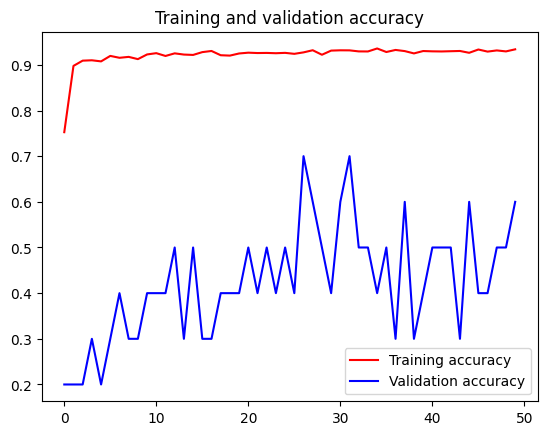

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Transfer learning


In [17]:
def cut_model(original_model, cut_index):
  # Assuming you have an original model with its weights named "original_model"

  # Create a new model with the desired layers from the original model
  cut_model = tf.keras.Model(inputs=original_model.inputs, outputs=original_model.layers[cut_index].output)

  # Copy the weights from the original model to the cut model
  for i in range(cut_index):
      print(cut_model.layers[i])
      print(original_model.layers[i])
      cut_model.layers[i].set_weights(original_model.layers[i].get_weights())

  return cut_model

In [18]:
# Fine tune the last two dense relu layers with the new data

# I'm using the same train_datagen, this is fine as long
# as the options that I want to use is the same
new_data_generator = train_datagen.flow_from_directory(
    # TODO: Sesuaikan
    directory=os.path.join(DATASET_TRANSFER_LEARNING_DIGIT, "training"),
    target_size=(300, 300),
    class_mode='categorical',
    batch_size=32,
    color_mode='grayscale',
)

for layer in model.layers:
  # TODO: Might be good to set the layer name other than dense
  # "dense" and "dense_1" are the last two layers
  if layer.name not in (
      "dense",
      "dense_1"):
    layer.trainable = False

# Start the fine tuning
history = model.fit(new_data_generator, epochs=100, steps_per_epoch=4, validation_data=validation_generator, verbose = 1, validation_steps=1)

Found 201 images belonging to 10 classes.
Epoch 1/100
4/4 [==============================] - 2s 448ms/step - loss: 0.4487 - accuracy: 0.8952 - val_loss: 0.8340 - val_accuracy: 0.7000
Epoch 2/100
4/4 [==============================] - 0s 78ms/step - loss: 0.0580 - accuracy: 1.0000 - val_loss: 1.4410 - val_accuracy: 0.6000
Epoch 3/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0589 - accuracy: 0.9766 - val_loss: 0.7914 - val_accuracy: 0.7000
Epoch 4/100
4/4 [==============================] - 0s 78ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 1.6004 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 71ms/step - loss: 0.0692 - accuracy: 0.9810 - val_loss: 1.5403 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0385 - accuracy: 0.9905 - val_loss: 1.4171 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 101ms/step - loss: 0.1113 - accuracy: 0.9766 - val_loss: 3.4292

In [19]:
loss, accuracy = model.evaluate(validation_generator)
print("loss", loss)
print("accuracy", accuracy)

1/1 [==============================] - 0s 79ms/step - loss: 1.1552 - accuracy: 0.8000
loss 1.1552057266235352
accuracy 0.800000011920929


In [20]:
# Deploy

# Ubah nama saved weights & tflite
# Jangan lupa download tflitenya
model.save_weights("digit.h5")
model.save("small_digit_model")

converter = tf.lite.TFLiteConverter.from_saved_model("small_digit_model")
tflite_model = converter.convert()

with open("small_digit.tflite", "wb") as f:
  f.write(tflite_model)